# XAS Workflow Task 1

This notebook contains the first task of the XAS processing workflow. 

The break up of the task consist of the following steps 

| Task                            | Input                                         | Output
| -------------                   |-------------                                  | -----  
| Create Athena project      |                                               | 
| 1. Import data                |File: fes2_rt01_mar02.xmu                      | 
| 2. Normalisation              |Parameters: Pre-edge range = -117.00 to 30.000 |
| 3. Save Athena Project        |                                               |File: FeS2_01.prj

For more details about larch, see https://xraypy.github.io/xraylarch/xafs/


In [1]:
from larch.io import read_ascii
# From BR demo at: https://vimeo.com/340207346 07:01
fe_xas = read_ascii('fes2_rt01_mar02.xmu')
# using vars(fe_xas) we see that the object has the following properties: 
# path, filename, header, data, attrs, energy, xmu, i0
# vars(fe_xas)

In [2]:
# the following show the contents of each
print("path:\t\t", fe_xas.path)
print("filename:\t", fe_xas.filename)
print(fe_xas.header)
print(fe_xas.data)
print(fe_xas.attrs)
print('energy:', fe_xas.energy)
print('i0:',fe_xas.i0)
print('xmu:',fe_xas.xmu)
print(fe_xas.array_labels)

path:		 fes2_rt01_mar02.xmu
filename:	 fes2_rt01_mar02.xmu
['#%name: FeS2 powder  Room Temperature', '#%atom: FeS2', '#%edge: K', '#%xtal: FeS2.inp', '#%prep: powder on tape, 4 layers', '#%ref:  none', '#%misc: Energy drive values recorded (encoder used, not recorded)', '#%det:  I0=N2 15cm; I1=N2 15cm', '#%temp: Room Temperature', '#%beam: GSECARS 13BM, vert slits = 2mm (at 45m)', '#%mono: Si(111) unfocussed, detuned 50%', '#%date: Sat Mar 16 15:13:22 2002', '#%cols: 348 E XMU I0', '#------------------------', '#   energy     xmu       i0']
[[6.9118277e+03 6.9169236e+03 6.9217638e+03 ... 7.9578470e+03
  7.9635370e+03 7.9692470e+03]
 [8.0926541e-01 8.0418730e-01 7.9959074e-01 ... 3.3897801e-01
  3.3392445e-01 3.2835579e-01]
 [2.7200200e+05 2.7003200e+05 2.6882700e+05 ... 3.0513400e+05
  3.0503700e+05 3.0534000e+05]]
<Group header attributes from fes2_rt01_mar02.xmu>
energy: [6911.8277 6916.9236 6921.7638 6926.875  6931.7907 6962.     6972.
 6982.     6992.     7002.     7012.     7022. 

## Calculate and plot $\mu$
Knowing the elements of the input data set it is possible to start manipulating and visualising the XAFS data. 

In this case $\mu$ is provided, so there is no need to calculate it, just rename it as mu (required by Larch for processing) and plot it agains the energy.


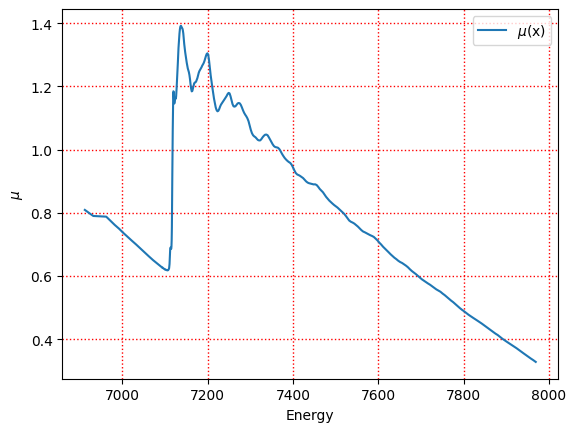

In [3]:
from numpy import log
from larch.utils import group2dict, dict2group

# Calculate mu 
def get_mu(xafs_group):
    # calculate mu
    mu_e = xafs_group.xmu
    # get a dictionary from te group
    xafs_dict = group2dict(xafs_group)
    # add mu to the dictionary
    xafs_dict['mu'] = mu_e
    xafs_group = dict2group(xafs_dict)
    return xafs_group

fe_xas = get_mu(fe_xas)

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(fe_xas.energy, fe_xas.mu, label='$\mu$(x)')
plt.xlabel('Energy')
plt.ylabel('$\mu$')
plt.legend() # include the leyend in the plot
plt.grid(color='r', linestyle=':', linewidth=1) #show and format grid

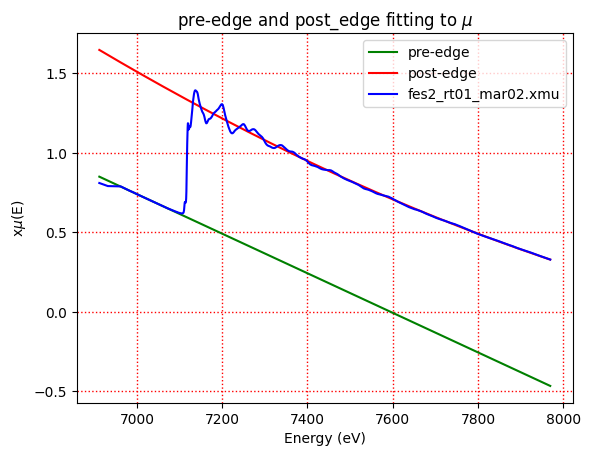

In [4]:
# https://vimeo.com/340207346 25:00
from larch.xafs import pre_edge
#calculate pre-edge and post edge and add them to group
# as with the basic workflow we want to avoid the data below E0 - 117.00
pre_edge(fe_xas, group=fe_xas, pre1=-117, pre2=-30)

plt.plot(fe_xas.energy, fe_xas.pre_edge, 'g', label='pre-edge') # plot pre-edge in green
plt.plot(fe_xas.energy, fe_xas.post_edge, 'r', label='post-edge')# plot post-edge in green
plt.plot(fe_xas.energy, fe_xas.xmu, 'b', label=fe_xas.filename) # plot mu in blue
plt.grid(color='r', linestyle=':', linewidth=1) #show and format grid
plt.xlabel('Energy (eV)') # label y graph
plt.ylabel('x$\mu$(E)') # label y axis
plt.title("pre-edge and post_edge fitting to $\mu$")
plt.legend() # show legend

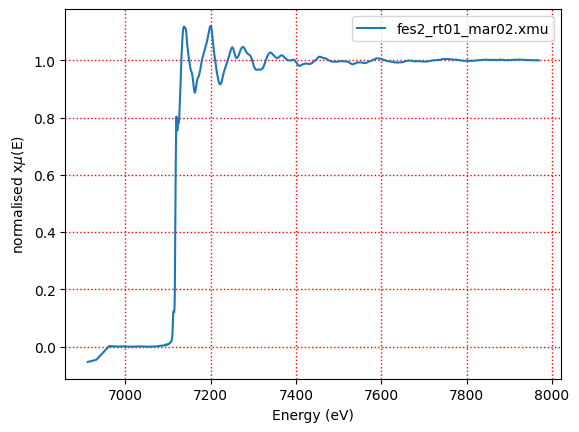

In [5]:
# https://vimeo.com/340207346 27:00
plt.plot(fe_xas.energy, fe_xas.flat, label=fe_xas.filename) # plot flattened and normalised energy
plt.grid(color='r', linestyle=':', linewidth=1) #show and format grid
plt.xlabel('Energy (eV)') # label y graph
plt.ylabel(r'normalised x$\mu$(E)') # label y axis
plt.legend() # show legend

In [6]:
# import the larch.io libraries for managing athena files
from larch.io import create_athena, read_athena, extract_athenagroup

# save as an athena project

project_name = 'fes2_larch.prj'
fe_project = create_athena(project_name)
fe_project.add_group(fe_xas)
fe_project.save()
vars(fe_project)

{'_larch': None,
 'groups': OrderedDict([('fes2_rt01_mar02_xmu', <Group 0x273651d1c40>),
              ('dmxom', <Group ascii_file fes2_rt01_mar02.xmu>)]),
 'header': '# Athena project file -- Demeter version 0.9.24\n# This file created at 2023-03-28T08:12:27\n# Using Larch version 0.9.66, Python 3.9.2rc1 on Windows-10-10.0.19041-SP0\n',
 'journal': '',
 'filename': 'fes2_larch.prj',
 'group_names': ['fes2_rt01_mar02_xmu']}